
<img src="6.jpeg" width="500">
<img src="5.jpeg" width="500">


# <span style="color: springgreen;">🌾Crop Production </span>

## <span style="color: springgreen;">✒️Objective </span>

The primary objective of analyzing this dataset is to understand the factors influencing crop production and to develop predictive models that can accurately forecast crop yields. This analysis aims to provide valuable insights to farmers, agricultural policymakers, and researchers to optimize agricultural practices and improve productivity.

## <span style="color: springgreen;">✒️Data Overview </span>

**The Dataset contains several key features of various crops produced in India. Below is a description for each features.**
- **Crop_Year**: The year in which the crop was harvested.
- **Season**: The season during which the crop was grown (e.g., Kharif, Rabi, Whole Year).
- **Crop**: The type of crop grown.
- **Area**: The area of land (in hectares) used for cultivation.
- **Production**: The total production of the crop (in tonnes).


## <span style="color: springgreen;">✒️Import Required Libraries </span>

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [152]:
#reading the dataset
df=pd.read_csv('Crop Production data.csv')

In [153]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [154]:
df['Crop_Year'].value_counts().sort_index()

Crop_Year
1997     8899
1998    11533
1999    12515
2000    13658
2001    13361
2002    16671
2003    17287
2004    14117
2005    13799
2006    14328
2007    14526
2008    14550
2009    14116
2010    14065
2011    14071
2012    13410
2013    13650
2014    10973
2015      562
Name: count, dtype: int64

In [155]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


> **Note**-
The dataset contains 7 features includes 4 Nominal Categorical Variables,a date column and 2 Numerical Columns. It also have several Null values.

In [157]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [158]:
df.duplicated().sum()

0

In [159]:
#Check for the null value presence in the dataset
round(df.isna().sum()/df.shape[0],4)*100

State_Name       0.00
District_Name    0.00
Crop_Year        0.00
Season           0.00
Crop             0.00
Area             0.00
Production       1.52
dtype: float64

> **Note**- 
There are 1.5% null values presents in the dataset, we can delete them as they have minimal impact on the Dataset.

In [160]:
#Deleting the null values from the dataset
df.dropna(inplace=True)

## <span style="color: springgreen;">✒️Exploratory Data Analysis </span>

In [161]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [162]:
#Add the categorical and numerical features in Separate lists
cats=[col for col in df.columns if df[col].dtype=="O"]
nums=['Area','Production']

In [163]:
#check for the unique values in Season
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [164]:
#Remove the extra spaces from the Values in Season
df['Season']=df['Season'].apply(lambda x : x.strip())
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [165]:
#Remove the extra spaces from the Values in Crops
df['Crop']=df['Crop'].apply(lambda x : x.strip())
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garli

In [166]:
#Check for the value counts in Season Features
df['Season'].value_counts()

Season
Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: count, dtype: int64

> **Note**- 


Since there are majorly 3 Crop Seasons such as: Kharif, Rabi and Zaid in India, however the dataset contains 6 Crop seasons (Kharif, Whole Year, Autumn, Autumn, Rabi, Summer, Winter).

- **Kharif Season**- This season includes the crops which are sown at the begining of Monsoon typically in June-july and harvested at the end of Monsoon (October-November).
- **Rabi Season** - The crops which are mainly sown in winter(October) and harvested in spring(March-April) are inclueded in Rabi Season Crops. 
- **Whole Year** - The crops which grown throughout the year, is termed as Whole Year Crops.
- **Summer Season**- Summer Season crops which is also knwon as Zaid Season. This includes the crops which are grown between Rabi and Kharif Season typically in March to June.
- **Autumn Season**- This can be classified into Kharif Season as the crops sown in june and harvested in October-November. 
- **Winter Season**- This season is also known as Rabi Season. They are also sown in winter(October) and harvested in spring(March-April).

In [167]:
#After the research we can replace the season like Summer, Autumn and Winter to Zaid, Kharif and Rabi respectively for better analysis
df['Season']=df['Season'].replace(['Summer','Autumn','Winter'],['Zaid','Kharif','Rabi'])
df['Season'].value_counts()

Season
Kharif        99213
Rabi          72210
Whole Year    56127
Zaid          14811
Name: count, dtype: int64

In [168]:
#check for the unique crops agricultured in different Seasons
for i in df['Season'].unique():
    print(f'Crops agricultured in {i}')
    print(df[df['Season']==i]['Crop'].unique())
    print(' ')

Crops agricultured in Kharif
['Arecanut' 'Other Kharif pulses' 'Rice' 'Sugarcane' 'Arhar/Tur' 'Bajra'
 'Castor seed' 'Cotton(lint)' 'Dry chillies' 'Groundnut' 'Horse-gram'
 'Jowar' 'Korra' 'Maize' 'Moong(Green Gram)' 'Ragi' 'Sunflower' 'Tobacco'
 'Masoor' 'Sesamum' 'Urad' 'Gram' 'Onion' 'other misc. pulses' 'Samai'
 'Small millets' 'Soyabean' 'Mesta' 'Cowpea(Lobia)' 'other oilseeds'
 'Brinjal' 'Coriander' 'Grapes' 'Lemon' 'Linseed' 'Mango' 'Papaya'
 'Pome Granet' 'Sapota' 'Tomato' 'Turmeric' 'Cabbage' 'Cashewnut' 'Potato'
 'Sweet potato' 'Niger seed' 'Tapioca' 'Dry ginger' 'Safflower' 'Varagu'
 'Jute' 'Paddy' 'Orange' 'Blackgram' 'Sannhamp' 'Guar seed' 'Coconut'
 'Banana' 'Moth' 'Other Cereals & Millets' 'Pulses total'
 'Peas & beans (Pulses)' 'Ginger' 'Garlic' 'Cond-spcs other' 'Wheat'
 'Barley' 'Rapeseed &Mustard' 'Black pepper' 'Total foodgrain' 'Kapas'
 'Cardamom' 'Tea' 'Colocosia' 'Oilseeds total' 'Bean' 'Jobster' 'Perilla'
 'Rajmash Kholar' 'Ricebean (nagadal)' 'Jute & mesta' 'Kh

In [169]:
df['Crop'].replace('Sannhamp','Sanhemp',inplace=True)

> **Note**

Overall, the crop lists for each season are mostly accurate, though there are a few minor overlaps where some crops can be cultivated in multiple seasons depending on regional agricultural practices.

## <span style="color: springgreen;">✒️Feature Engineering </span>

> **Note**-

Adding a new columns Crop_yields- It is the amount of agricultural production divided by Area. 

By analyzing crop yields, we can identify which state has the highest agricultural output.


In [170]:
df['crop_yield']=round(df['Production']/df['Area'],2)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23


In [171]:
# Categorize crops into different categories 
fruits = ['Banana', 'Grapes', 'Lemon', 'Mango', 'Papaya', 'Pome Granet', 'Sapota',
    'Orange', 'Pineapple', 'Water Melon', 'Apple', 'Peach', 'Pear', 'Plums',
    'Litchi', 'Ber', 'Other Fresh Fruits', 'Citrus Fruit', 'Pome Fruit',
    'Jack Fruit','Other Citrus Fruit']

vegetables = ['Onion', 'Tomato', 'Cabbage', 'Potato', 'Sweet potato', 'Brinjal',
    'Coriander', 'Turmeric', 'Dry chillies', 'Cauliflower',
    'Bottle Gourd', 'Turnip', 'Carrot', 'Redish', 'Pump Kin', 'Ash Gourd',
    'Beet Root', 'Lab-Lab', 'Ribed Guard', 'Yam', 'Bhindi', 'Cucumber',
    'Bitter Gourd', 'Drum Stick', 'Snak Guard', 'Beans & Mutter(Vegetable)',
    'Peas  (vegetable)', 'Other Vegetables','Bean']

pulses = ['Arhar/Tur', 'Moong(Green Gram)', 'Urad', 'Gram', 'Masoor', 'Peas & beans (Pulses)',
    'Other Kharif pulses', 'other misc. pulses', 'Horse-gram', 'Cowpea(Lobia)',
    'Other  Rabi pulses', 'Blackgram', 'Rajmash Kholar', 'Lentil', 'Pulses total',
    'Moth', 'Khesari','Ricebean (nagadal)', 'Guar seed']

cereals = ['Rice', 'Paddy', 'Wheat', 'Maize', 'Jowar', 'Bajra', 'Ragi', 'Korra','Barley',
    'Small millets', 'Samai', 'Varagu', 'Other Cereals & Millets', 'Total foodgrain','Tapioca']

oilseeds = ['Castor seed', 'Sunflower', 'Sesamum', 'Niger seed', 'Linseed', 'Groundnut','Coconut',
    'Soyabean', 'Safflower', 'other oilseeds', 'Oilseeds total', 'Rapeseed &Mustard']

commercial_crops = ['Sugarcane', 'Tobacco',  'Tea', 'Coffee',]    

nuts = ['Arecanut', 'Cashewnut', 'Arcanut (Processed)', 'Atcanut (Raw)',
    'Cashewnut Processed', 'Cashewnut Raw','Other Dry Fruit']

spices = ['Dry ginger', 'Turmeric', 'Dry chillies', 'Black pepper', 'Ginger', 'Garlic',
    'Cond-spcs other', 'Cardamom', 'Black pepper', 'Perilla']


fibres = ['Cotton(lint)', 'Jute', 'Mesta', 'Jute & mesta', 'other fibres','Kapas','Rubber','Sanhemp']

other = ['Jobster']

> **Note**- 

For better analysis, we categorized the crops according to their original categories.

In [172]:
#Define a function to add a crop category column 

def categorize_crop(crop):

    if crop in fruits:
           return 'Fruits'
    elif crop in vegetables:
        return 'Vegetables'
    elif crop in pulses:
        return 'Pulses'
    elif crop in cereals:
        return 'Cereals'
    elif crop in oilseeds:
        return "Oilseeds"
    elif crop in commercial_crops:
        return 'Commercial_crops'
    elif crop in nuts:
        return 'Nuts'
    elif crop in spices:
        return 'Spices'
    elif crop in fibres:
        return 'Fibres'
    else:
        return "Other"

In [173]:
#Add a new column 'Crop_cat' in the dataset
df['crop_cat']=df['Crop'].apply(categorize_crop)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15,Cereals
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23,Nuts


In [174]:
df['crop_cat'].value_counts()

crop_cat
Cereals             65071
Pulses              58012
Oilseeds            47710
Vegetables          34610
Commercial_crops    10532
Fibres               9814
Spices               7736
Fruits               6153
Nuts                 2703
Other                  20
Name: count, dtype: int64

In [175]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15,Cereals
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23,Nuts


In [176]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [177]:
df['State_Name']=df['State_Name'].apply(lambda x:x.strip())

> **Note**- 

Since India is a big Country for better visualization we wil categorize the states into different Regions mainly North, South, East, West,North-east and North-west

In [178]:
#Categorize the states into different Regions 
north = ['Chandigarh', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Punjab', 'Rajasthan', 'Uttarakhand', 'Uttar Pradesh']
south = [ 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']
east = ['Arunachal Pradesh', 'Assam', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']
west = ['Goa', 'Gujarat', 'Maharashtra', 'Daman and Diu', 'Madhya Pradesh', 'Chhattisgarh']


union_territories = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Ladakh', 'Lakshadweep', 'Delhi']

In [179]:
# Define a function to add a new column-Regions 
def categorize_regions(state):

    if state in north:
        return 'North'
    elif state in south:
        return 'South'
    elif state in east:
        return 'East'
    elif state in west:
        return 'West'
    elif state in union_territories:
        return 'Union Territory'

In [180]:
#add a new column in the dataset
df['Regions']=df['State_Name'].apply(categorize_regions)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59,Nuts,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50,Pulses,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15,Cereals,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64,Fruits,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23,Nuts,Union Territory


In [181]:
#Saveing the file, for dashboard creation
# file_path = 'crop_data.xlsx'
# df.to_excel(file_path, index=False)


In [182]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59,Nuts,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50,Pulses,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15,Cereals,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64,Fruits,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23,Nuts,Union Territory


In [183]:
Values=df.groupby('Crop').sum().sort_values(by="Production",ascending=False)['Production'].values
Labels=df.groupby('Crop').sum().sort_values(by="Production",ascending=False)['Production'].index

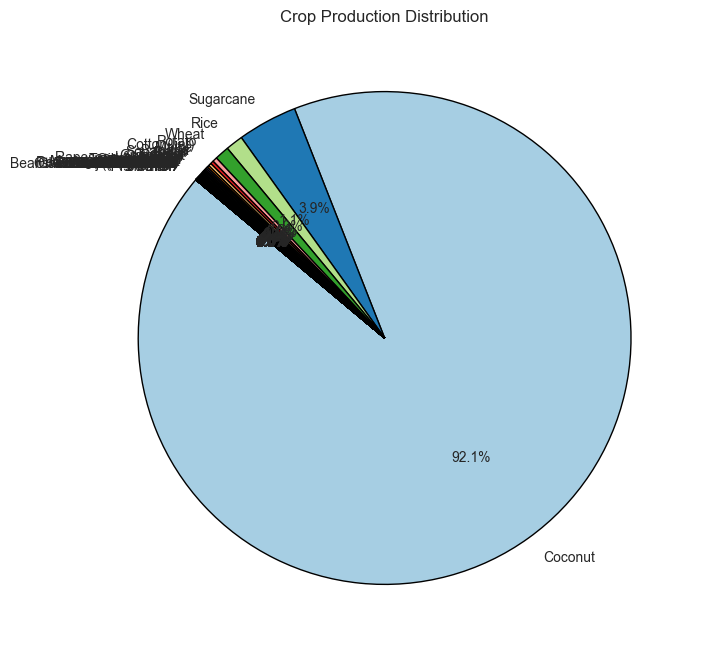

In [184]:
#Visualize the Production of Crops 
plt.figure(figsize=(10, 8))
plt.pie(Values, labels=Labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Crop Production Distribution')
plt.show()

> **Note**-

The plot shows that coconut production is overlapping with other crops, making it difficult to visualize the data effectively. To improve clarity, we decided to separate the coconut data from the rest of the dataset for better visualization.

In [185]:
#Separate coconut data from the main dataset
coconut_df=df[df['Crop']=='Coconut']
df.drop(df[df['Crop']=='Coconut'].index,inplace=True)

#Saveing the file, for dashboard creation
# file_path = 'coconut_df_data.xlsx'
# coconut_df.to_excel(file_path, index=False)



In [186]:
Values1=df.groupby('Crop').sum().sort_values(by="Production",ascending=False)['Production'].values
Labels1=df.groupby('Crop').sum().sort_values(by="Production",ascending=False)['Production'].index

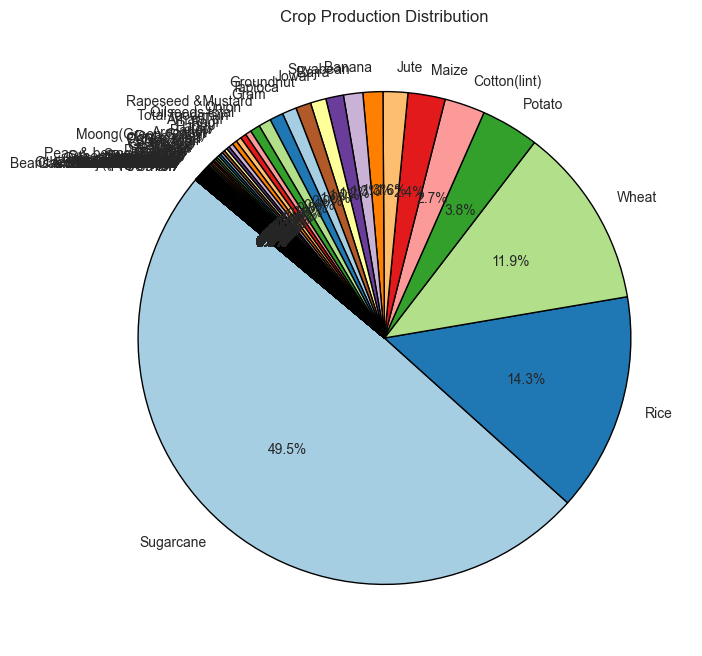

In [187]:
plt.figure(figsize=(10, 8))
plt.pie(Values1, labels=Labels1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Crop Production Distribution')
plt.show()

> **Note**-

- After separating the coconut data, the remaining dataset can now be visualized more clearly.
- This plot shows that approx 50% of Production generates through Sugarcane crops followed by rice, wheat and potato respectively.

In [188]:
Val1=df.groupby('crop_cat').sum().sort_values(by="Production",ascending=False)['Production'].values
Lab1=df.groupby('crop_cat').sum().sort_values(by="Production",ascending=False)['Production'].index

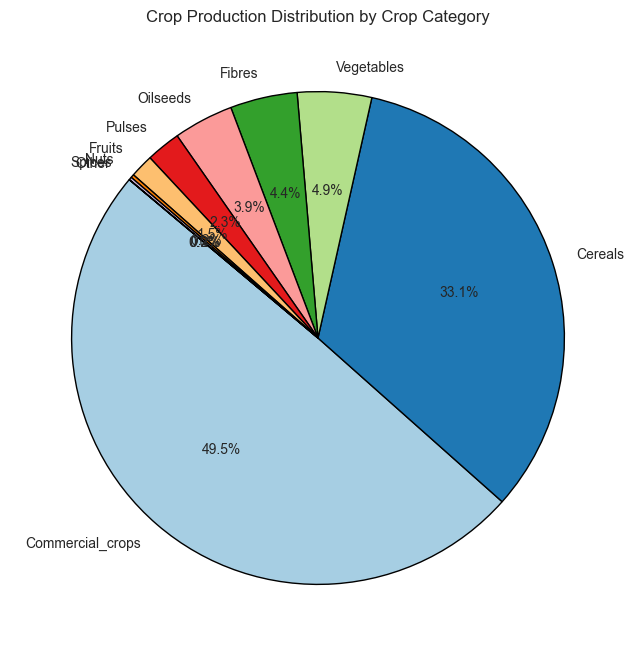

In [189]:
plt.figure(figsize=(10, 8))
plt.pie(Val1, labels=Lab1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Crop Production Distribution by Crop Category')

plt.show()

> **Note**-

Since the Sugarcane categorized under Commercial products, the production of commercial products remains consistently high.

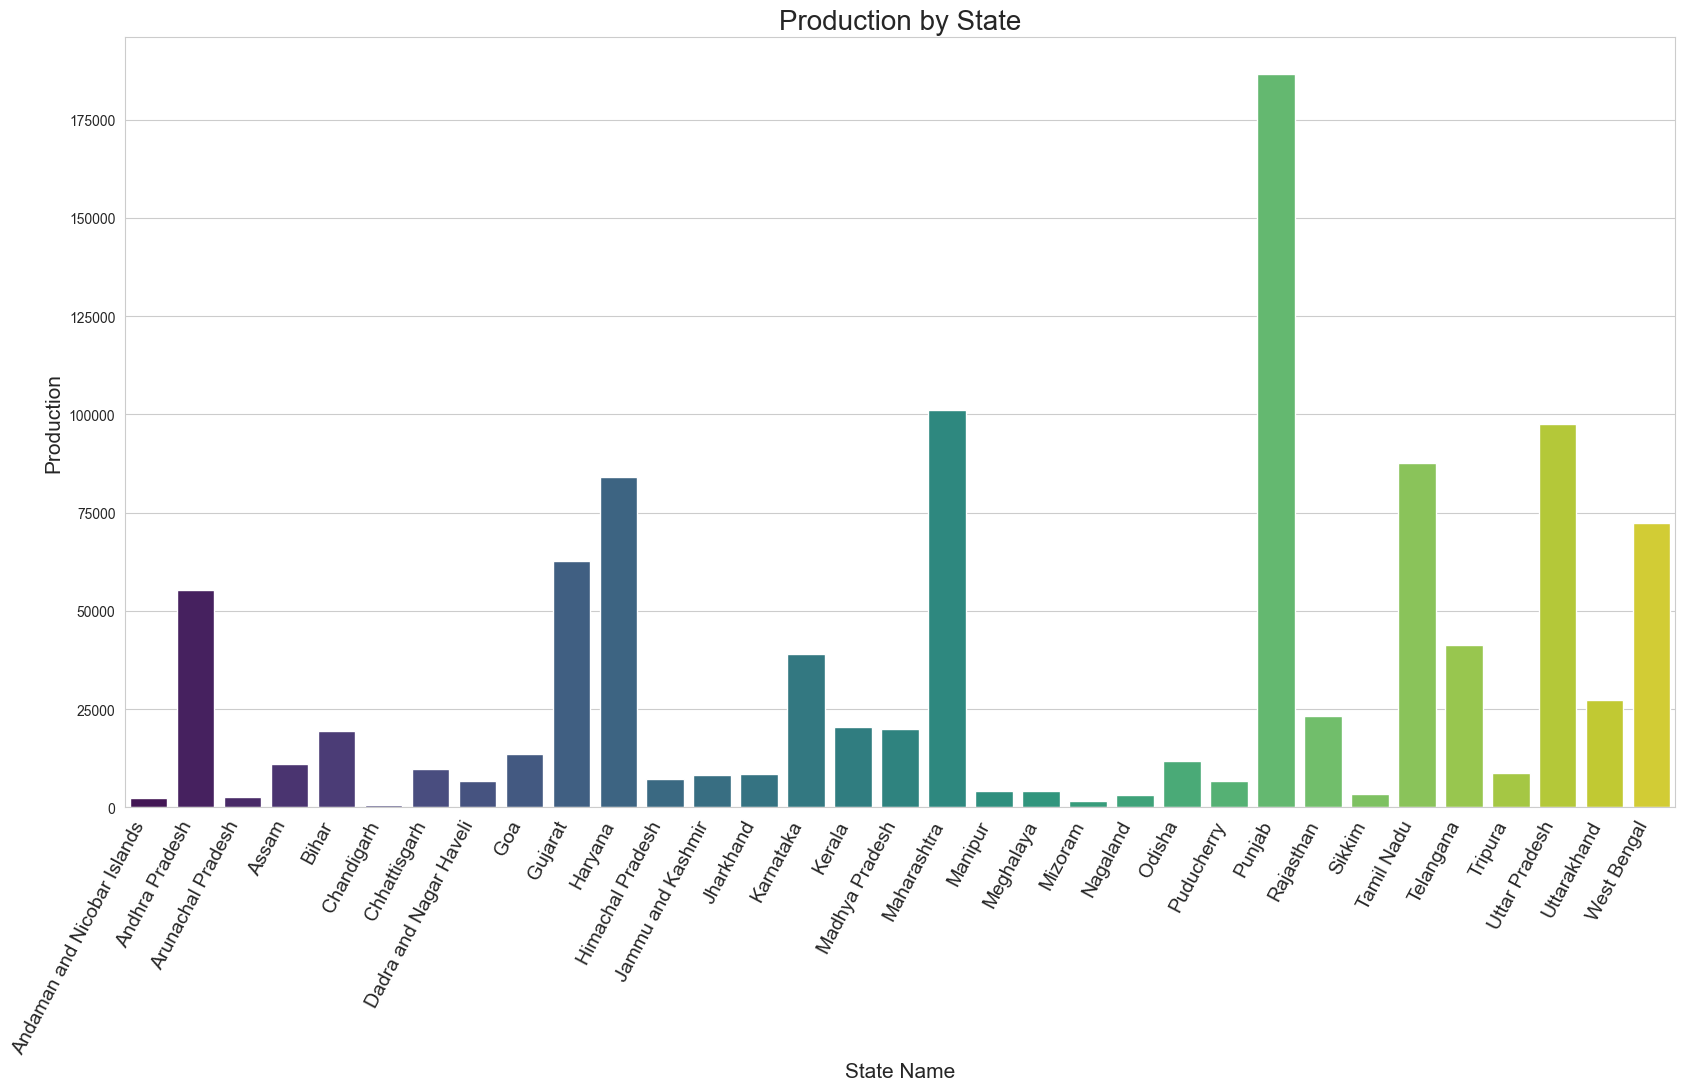

In [190]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.barplot(x='State_Name', y='Production',data=df, palette='viridis',errorbar=None)
plt.xticks(rotation=62, ha='right',fontsize=14)
plt.title('Production by State',fontsize=20)
plt.xlabel('State Name',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.show()

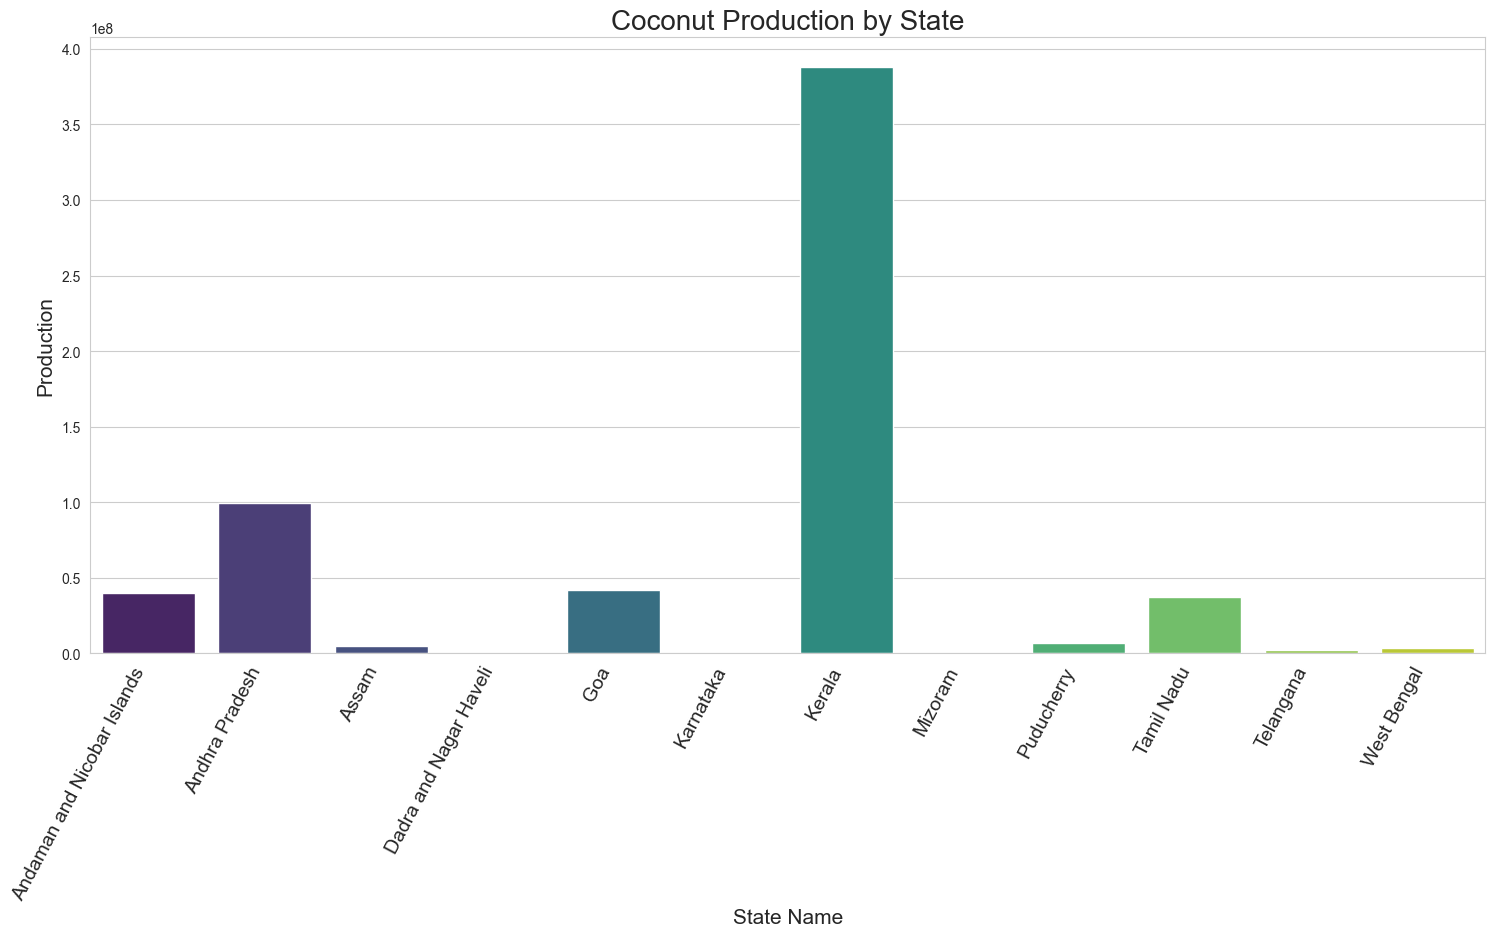

In [191]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.barplot(x='State_Name', y='Production',data=coconut_df, palette='viridis',errorbar=None)
plt.xticks(rotation=62, ha='right',fontsize=14)
plt.title('Coconut Production by State',fontsize=20)
plt.xlabel('State Name',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.show()

> **Note**-

- From the above plots, we can see that Punjab has the highest Production followed by Maharastra, Uttar Pradesh, Tamil Nadu and Hariyana.
- For the Coconut production Kerala is leading among the states.

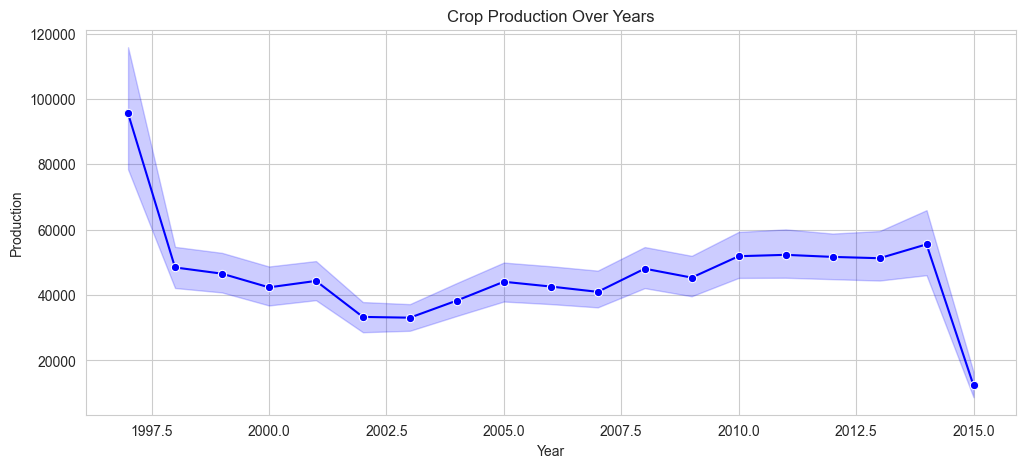

In [192]:
#Line plot for production over years
plt.figure(figsize=(12,5))
sns.lineplot(x=df['Crop_Year'], y=df['Production'], color='blue', marker='o', linestyle='-')
plt.title('Crop Production Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)

plt.show()

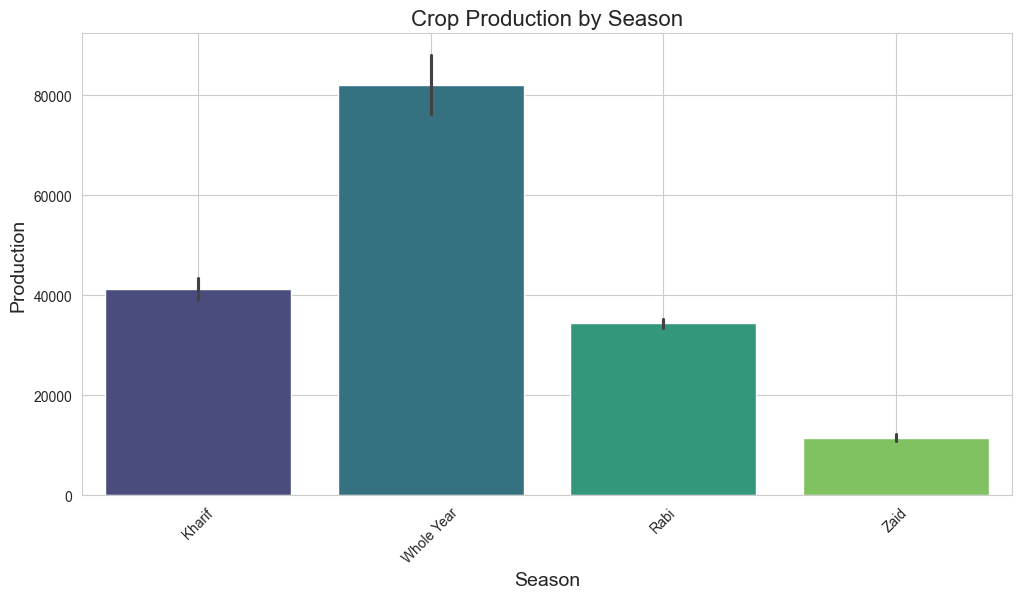

In [193]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid') 
sns.barplot(x=df['Season'], y=df['Production'], palette='viridis')
plt.title('Crop Production by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

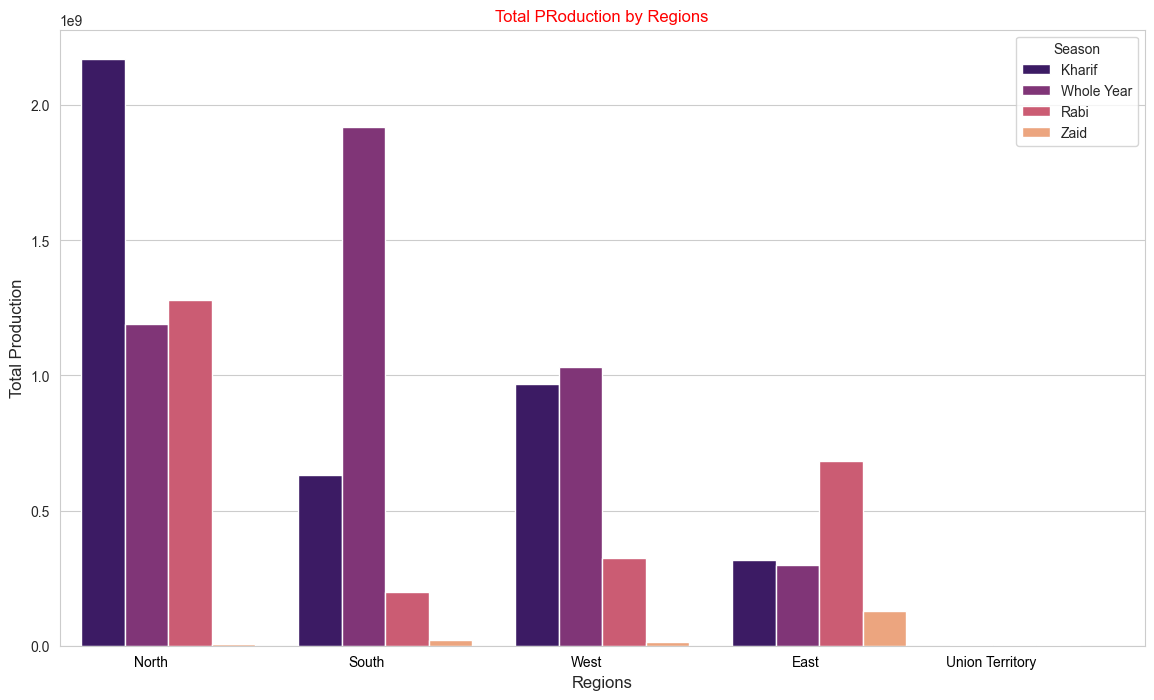

In [194]:
rev_order= df.groupby('Regions')["Production"].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(x="Regions",y="Production",data=df,estimator="sum",errorbar=None,order=rev_order.index,hue="Season", palette="magma")
plt.title('Total PRoduction by Regions',color='r')
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.xticks(ha='right',color='black')
plt.show()


> **Note**-
- The north regions has the highest production in Kharif crops while South has the highest production in Whole year crops.
- Rabi seasonal crops dominating in East regions because of the favourable conditons for winter crops in this area.


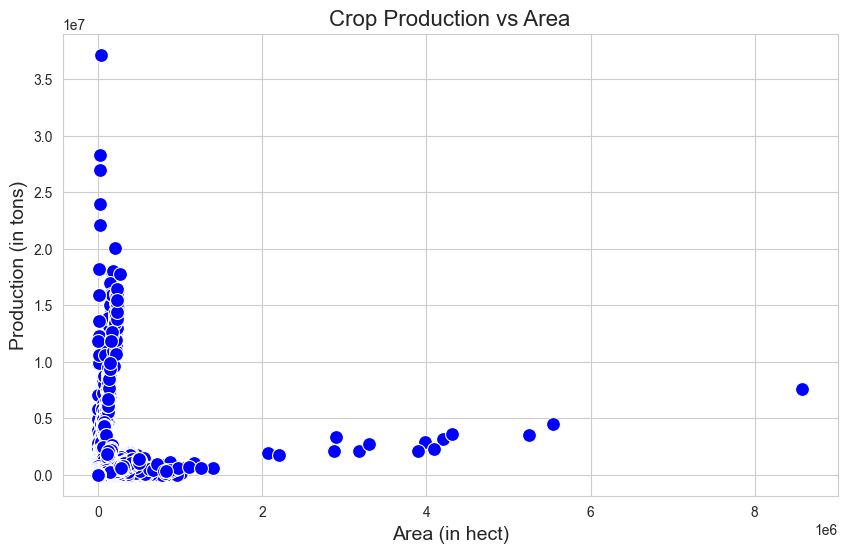

In [195]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Area'], y=df['Production'], color='blue', s=100)
plt.title('Crop Production vs Area', fontsize=16)
plt.xlabel('Area (in hect)', fontsize=14)
plt.ylabel('Production (in tons)', fontsize=14)

plt.show()

> **Note**-

- Most of the data points represents higher production in small areas.
- There is positive corelation in small areas and a mariginal diminishing returns with increase in area.
- The plot shows there is strong relationship only up to a certain point.

In [196]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59,Nuts,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50,Pulses,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15,Cereals,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64,Fruits,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23,Nuts,Union Territory


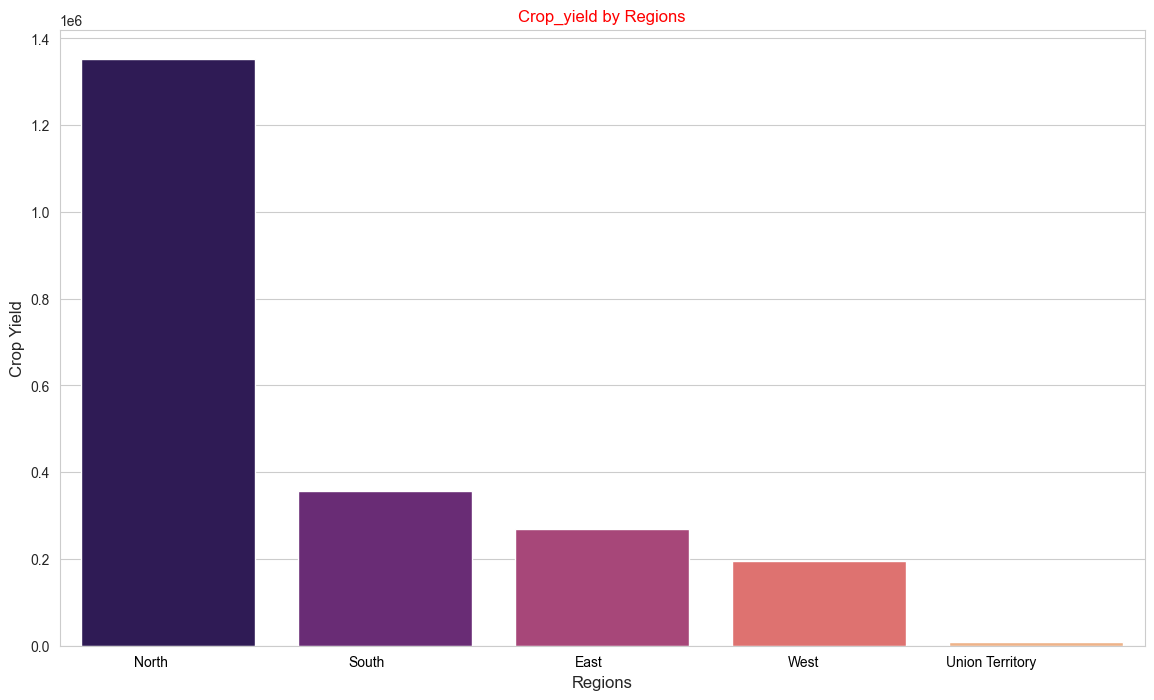

In [197]:
rev_order= df.groupby('Regions')["crop_yield"].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(x="Regions",y="crop_yield",data=df,estimator="sum",errorbar=None,order=rev_order.index, palette="magma")
plt.title('Crop_yield by Regions',color='r')
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Crop Yield', fontsize=12)
plt.xticks(ha='right',color='black')
plt.show()

> **Note**-
- North regions has the highest crop yield rather than other regions, suggesting that favourable factors are available for production in this Area.

There are over 100 different crops produced in India, I will focus on analyzing the most widely produced crops.

### 1. Rice

In [198]:
rice_df=df[df['Crop'].isin(['Rice','Paddy'])]
rice_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.15,Cereals,Union Territory
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.61,Cereals,Union Territory
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.70,Cereals,Union Territory
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.73,Cereals,Union Territory
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.37,Cereals,Union Territory


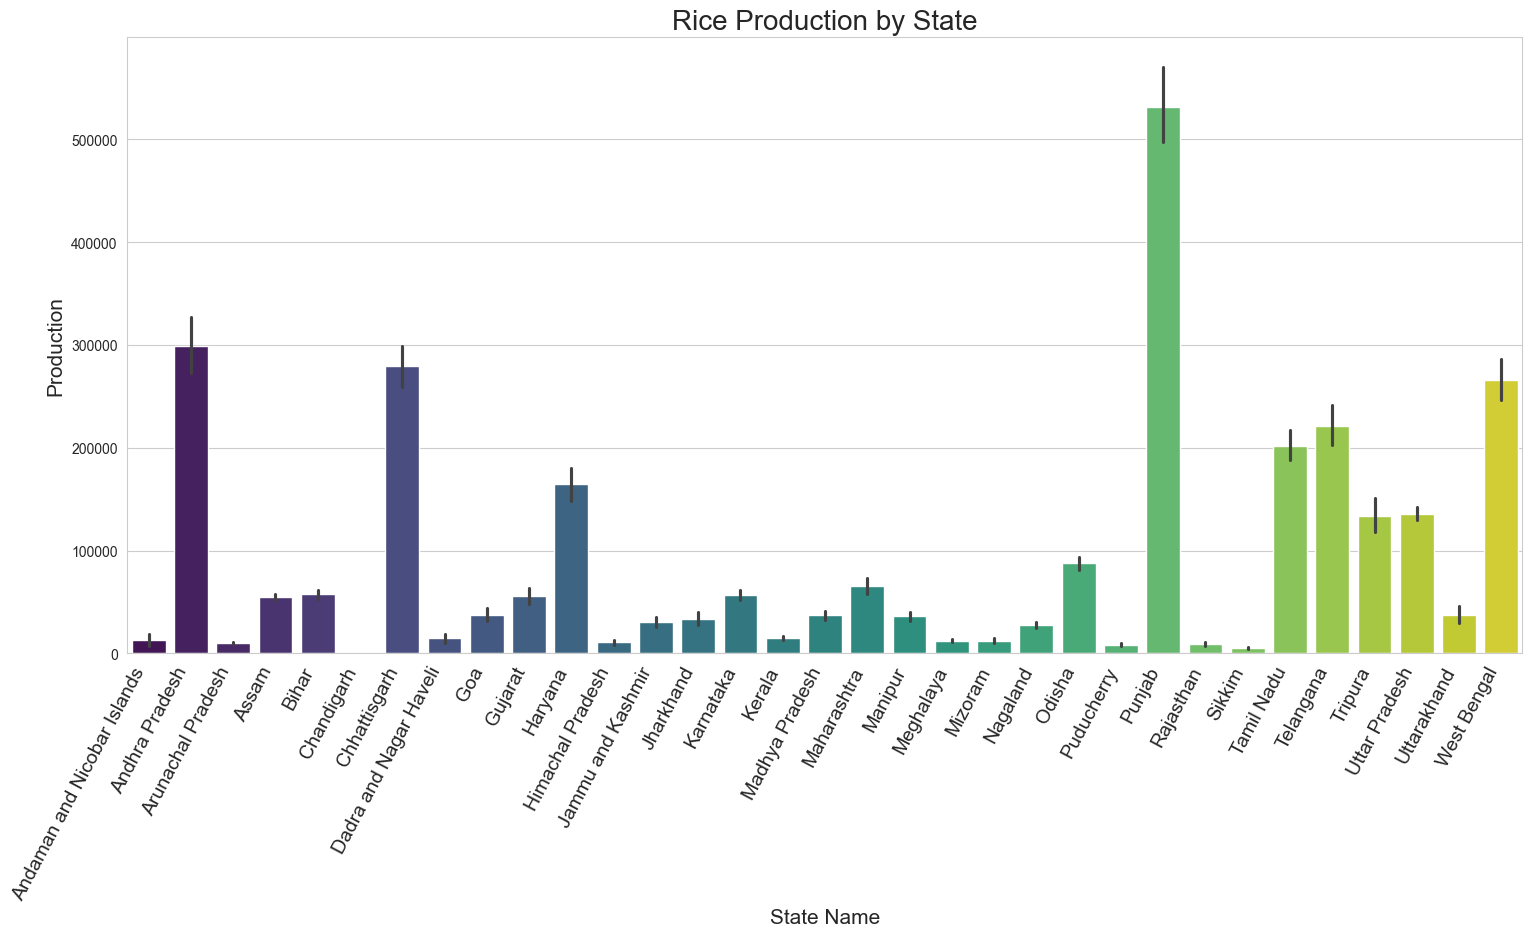

In [199]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.barplot(x='State_Name', y='Production',data=rice_df, palette='viridis')
plt.xticks(rotation=62, ha='right',fontsize=14)
plt.title('Rice Production by State',fontsize=20)
plt.xlabel('State Name',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.show()

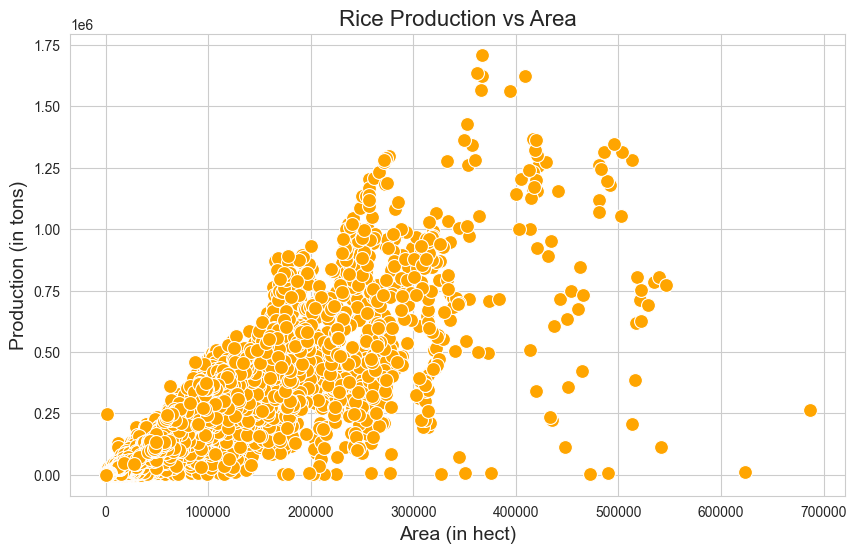

In [200]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production',data=rice_df, color='orange', s=100)
plt.title('Rice Production vs Area', fontsize=16)
plt.xlabel('Area (in hect)', fontsize=14)
plt.ylabel('Production (in tons)', fontsize=14)

plt.show()

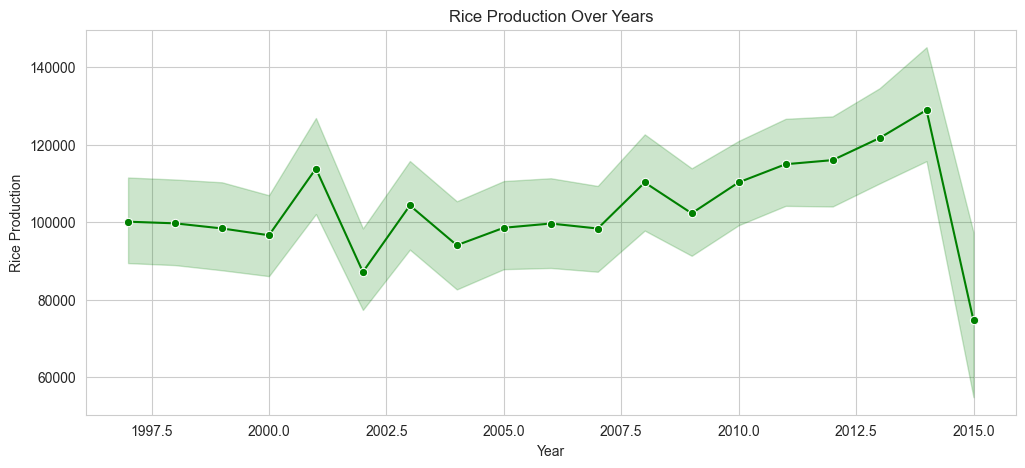

In [201]:
#Line plot for rice production over years
plt.figure(figsize=(12,5))
sns.lineplot(x=rice_df['Crop_Year'], y=rice_df['Production'], color='green', marker='o', linestyle='-')
plt.title('Rice Production Over Years')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.grid(True)

plt.show()

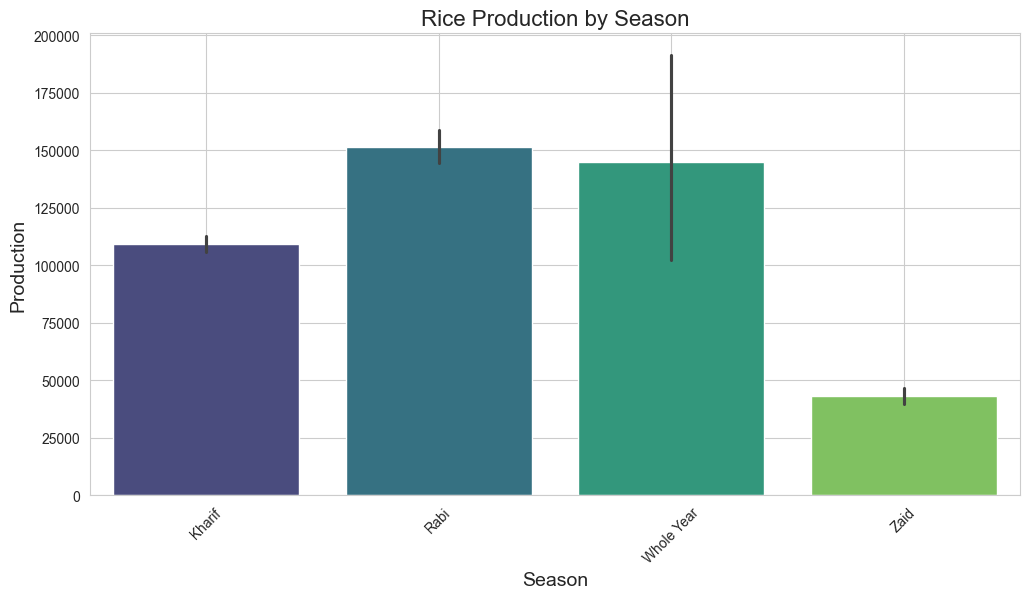

In [202]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid') 
sns.barplot(x=rice_df['Season'], y=rice_df['Production'], palette='viridis')
plt.title('Rice Production by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

> **Insights**-

- We know rice is a rabi crop but the plot shows that its production in the rabi season is significantly the same as its production for the whole year.
- Rice crop is mostly depends on season, area and States.

### 2.Wheat

In [203]:
wt_df=df[df['Crop']=='Wheat']
wt_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,0.67,Cereals,South
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,0.50,Cereals,South
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,0.67,Cereals,South
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,0.57,Cereals,South
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,0.69,Cereals,South


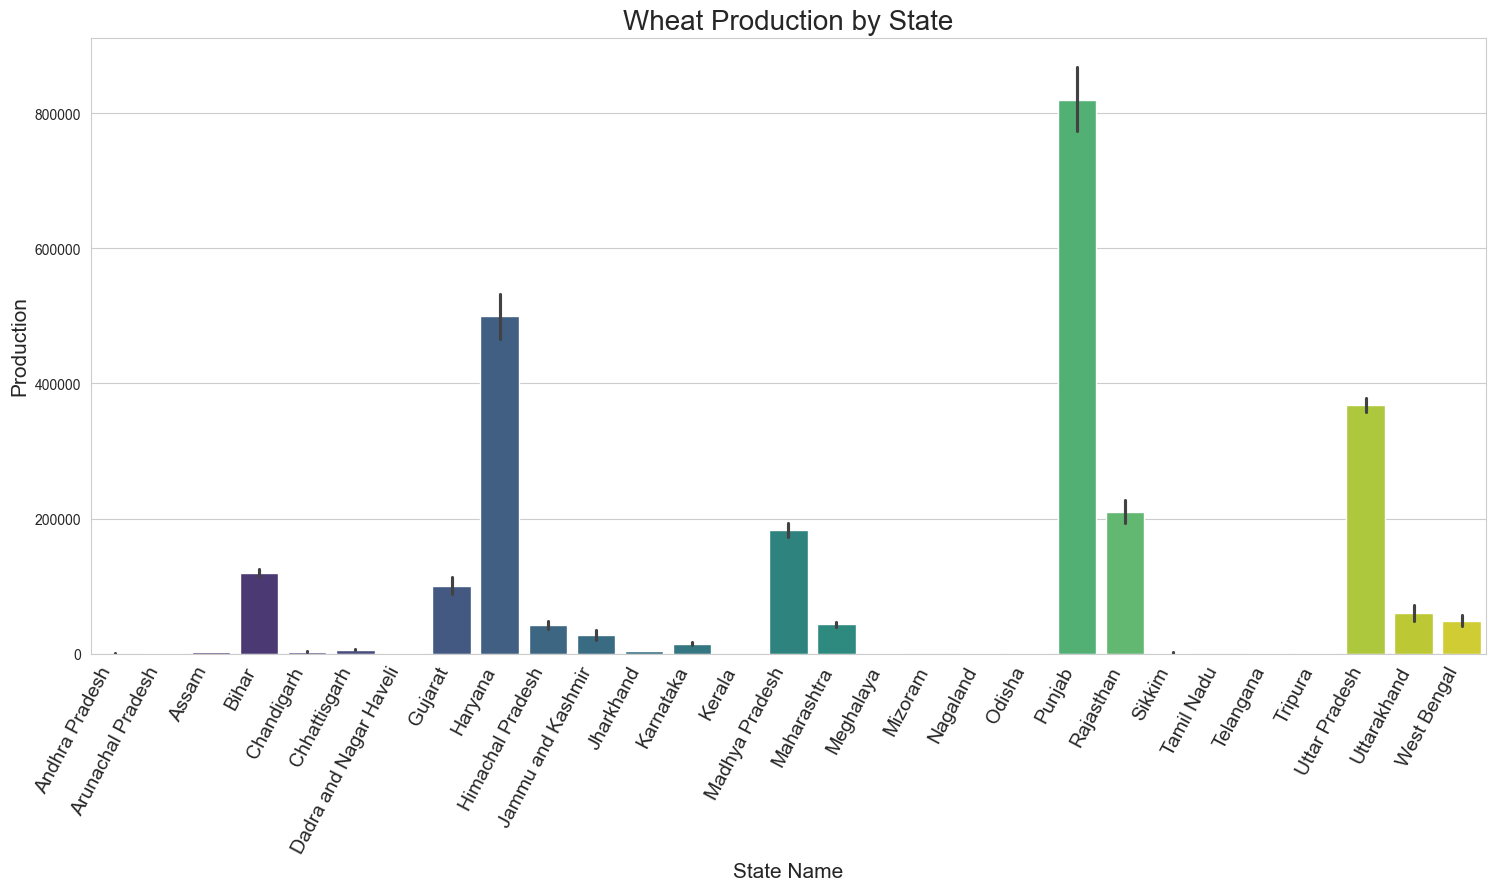

In [204]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.barplot(x='State_Name', y='Production',data=wt_df, palette='viridis')
plt.xticks(rotation=62, ha='right',fontsize=14)
plt.title('Wheat Production by State',fontsize=20)
plt.xlabel('State Name',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.show()

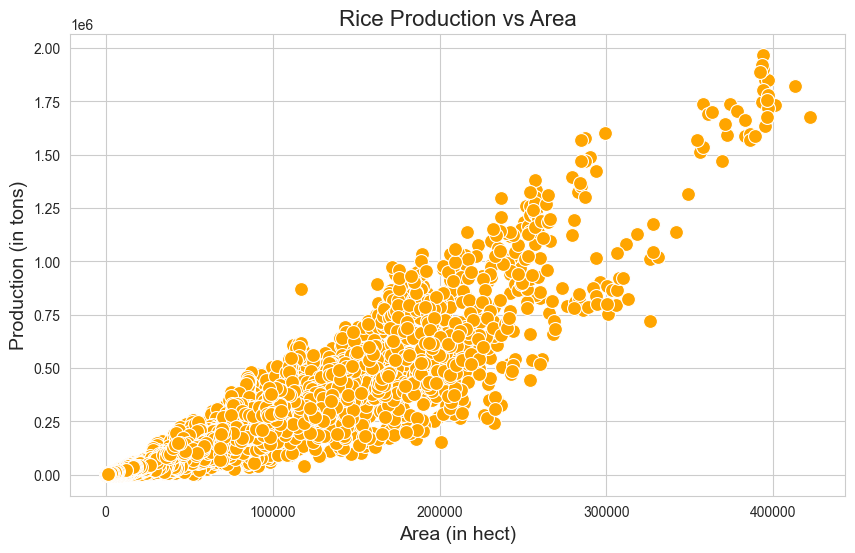

In [205]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production',data=wt_df, color='orange', s=100)
plt.title('Rice Production vs Area', fontsize=16)
plt.xlabel('Area (in hect)', fontsize=14)
plt.ylabel('Production (in tons)', fontsize=14)

plt.show()

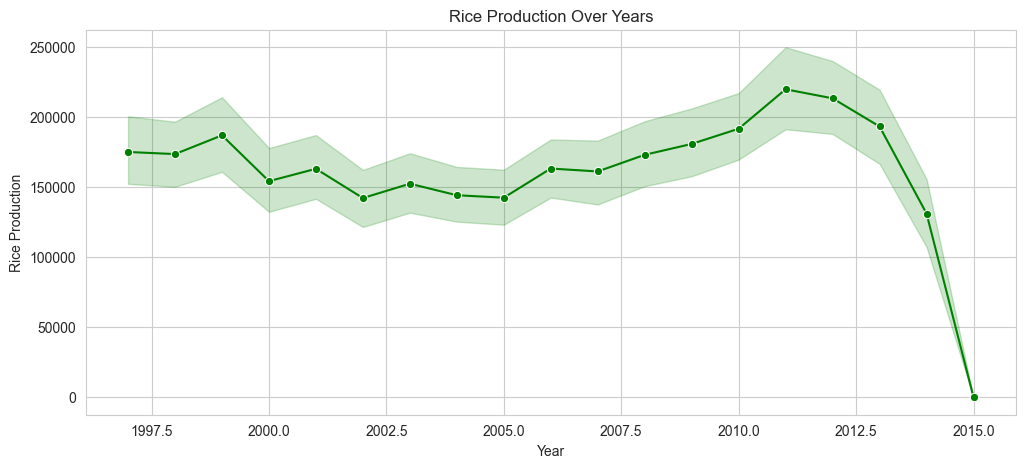

In [206]:
#Line plot for rice production over years
plt.figure(figsize=(12,5))
sns.lineplot(x='Crop_Year', y='Production',data=wt_df,color='green', marker='o', linestyle='-')
plt.title('Rice Production Over Years')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.grid(True)

plt.show()

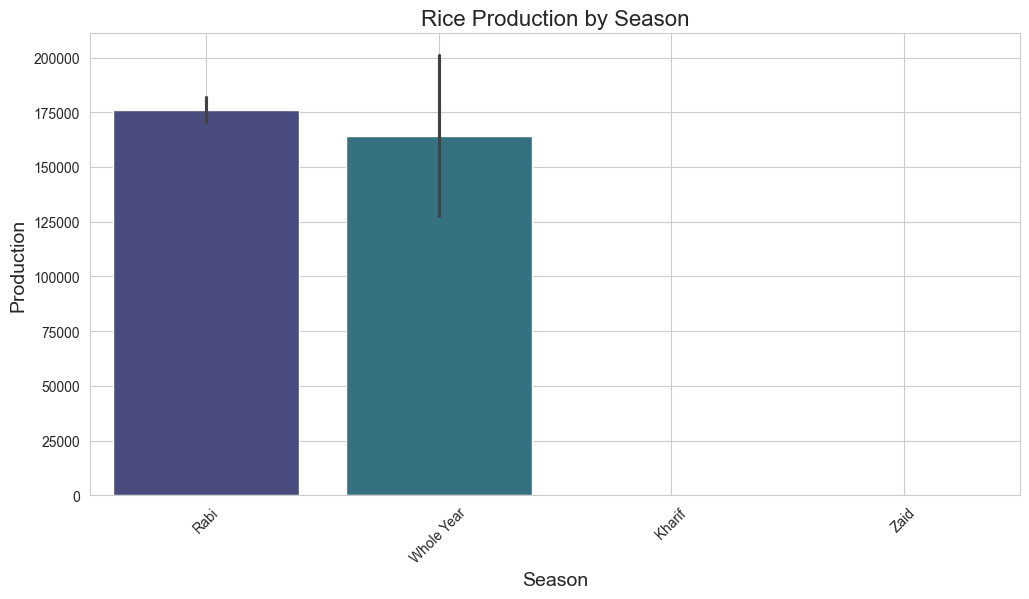

In [207]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid') 
sns.barplot(x='Season', y='Production',data=wt_df, palette='viridis')
plt.title('Rice Production by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

> **Insights**-

- Wheat production increased from 2006 to 2011 then decreased from 2011 to 2015.
- Wheat and Rice has the highest production in Punjab.
- The production is directly depends on Area, as area increases the production of Wheat increases.

### 3. Coconut

In [208]:
coconut_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,3583.22,Oilseeds,Union Territory
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,3542.06,Oilseeds,Union Territory
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,3700.11,Oilseeds,Union Territory
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,3750.67,Oilseeds,Union Territory
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,2847.56,Oilseeds,Union Territory


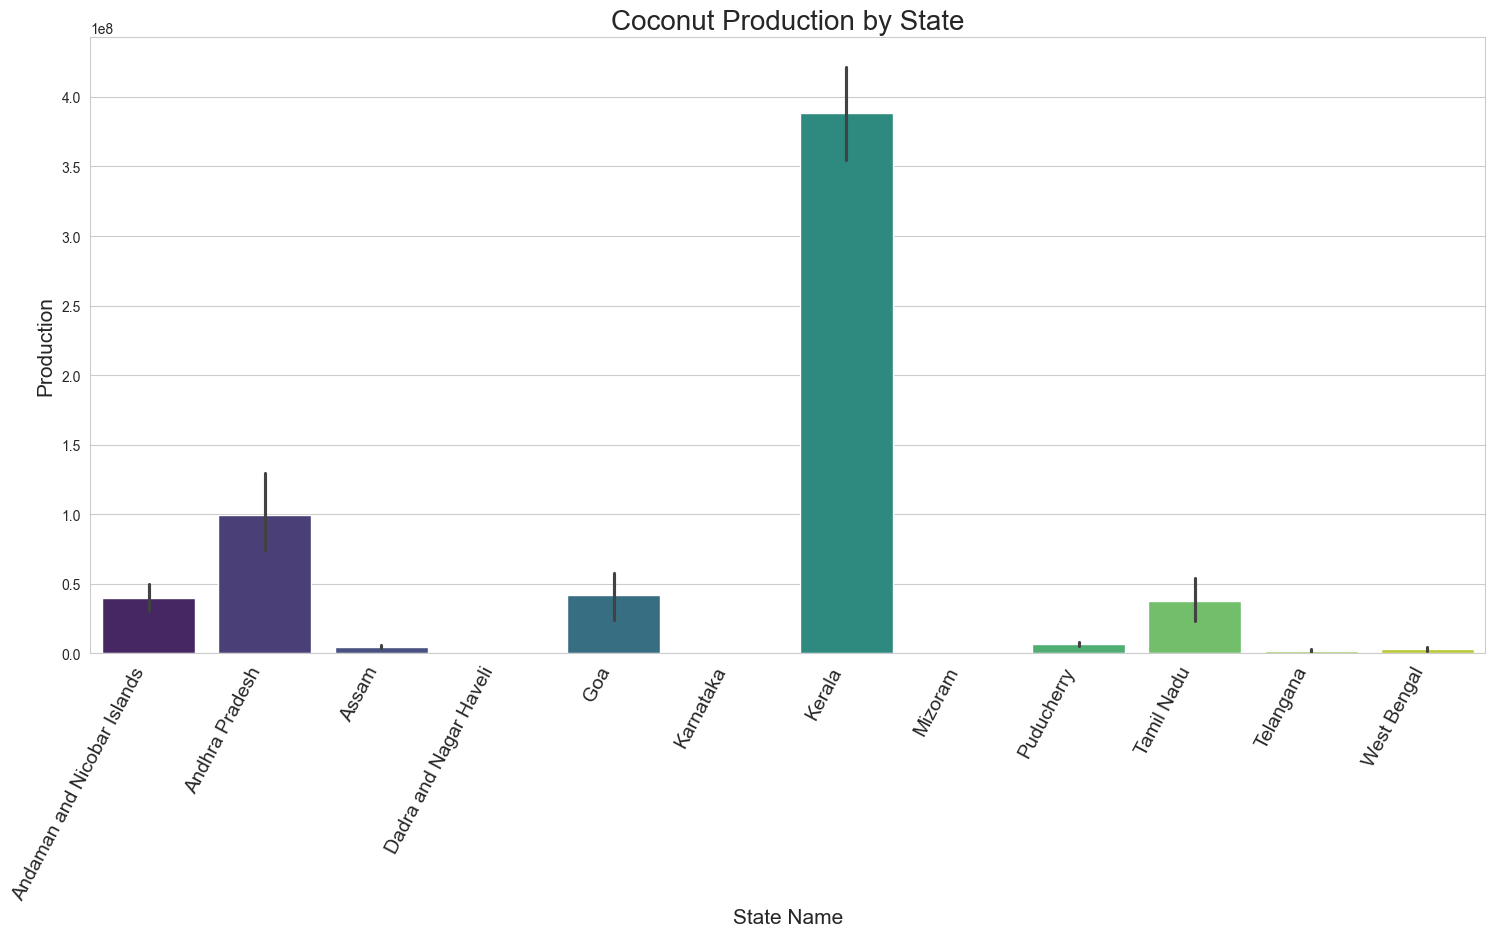

In [209]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.barplot(x='State_Name', y='Production',data=coconut_df, palette='viridis')
plt.xticks(rotation=62, ha='right',fontsize=14)
plt.title('Coconut Production by State',fontsize=20)
plt.xlabel('State Name',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.show()

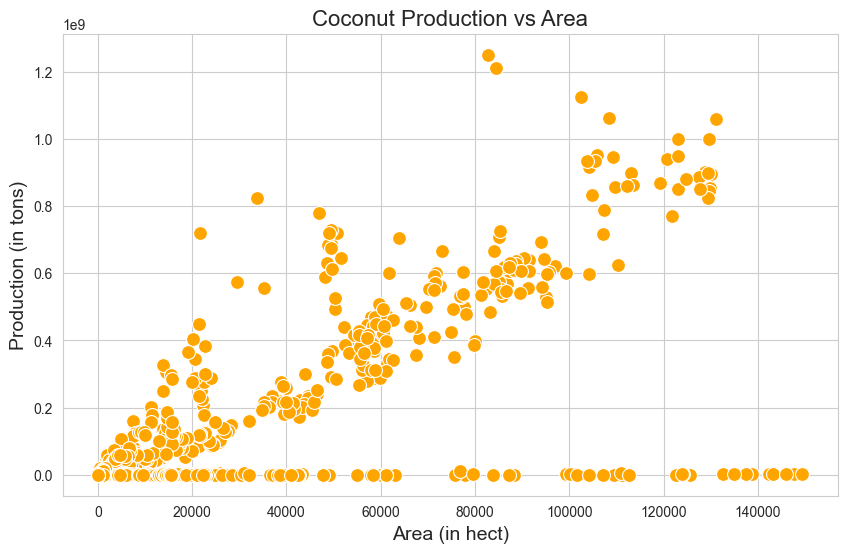

In [210]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production',data=coconut_df, color='orange', s=100)
plt.title('Coconut Production vs Area', fontsize=16)
plt.xlabel('Area (in hect)', fontsize=14)
plt.ylabel('Production (in tons)', fontsize=14)

plt.show()

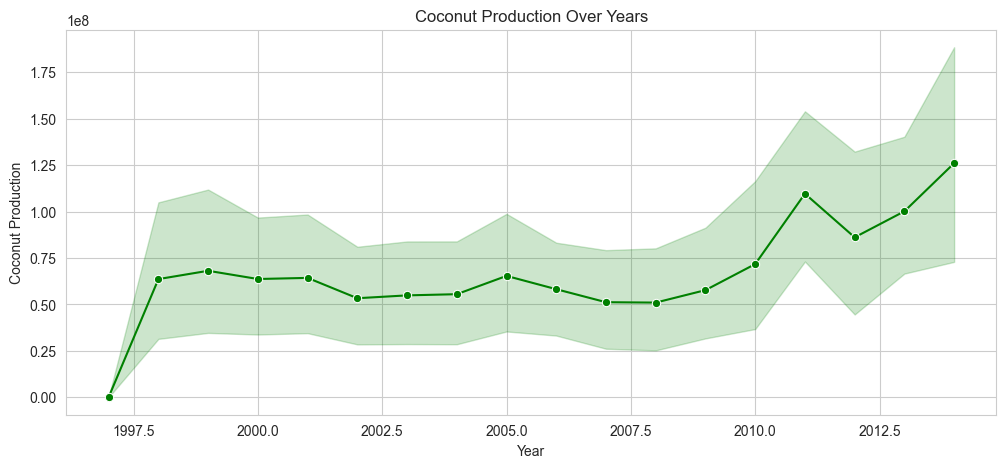

In [211]:
#Line plot for rice production over years
plt.figure(figsize=(12,5))
sns.lineplot(x='Crop_Year', y='Production',data=coconut_df,color='green', marker='o', linestyle='-')
plt.title('Coconut Production Over Years')
plt.xlabel('Year')
plt.ylabel('Coconut Production')
plt.grid(True)

plt.show()

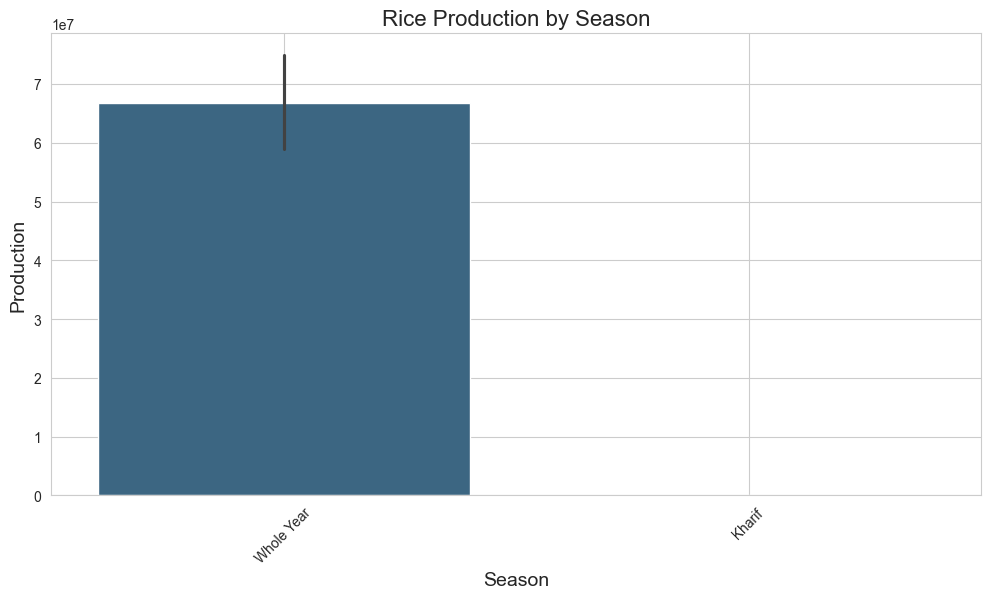

In [212]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid') 
sns.barplot(x='Season', y='Production',data=coconut_df, palette='viridis')
plt.title('Rice Production by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

> **Insights**-

- Kerala has the highest coconut production among the states followed by ANdhra pradsh.
- Coconut crop is mainly agricultured throughout the YEar. 
- The production of coconut is directly related with the Area of agriculture.

### 4. Sugar Cane

In [213]:
sc_df=df[df['Crop']=='Sugarcane']
sc_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,2.00,Commercial_crops,Union Territory
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,1.00,Commercial_crops,Union Territory
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,8.00,Commercial_crops,Union Territory
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,2.50,Commercial_crops,Union Territory
65,Andaman and Nicobar Islands,NICOBARS,2010,Kharif,Sugarcane,13.4,41.75,3.12,Commercial_crops,Union Territory


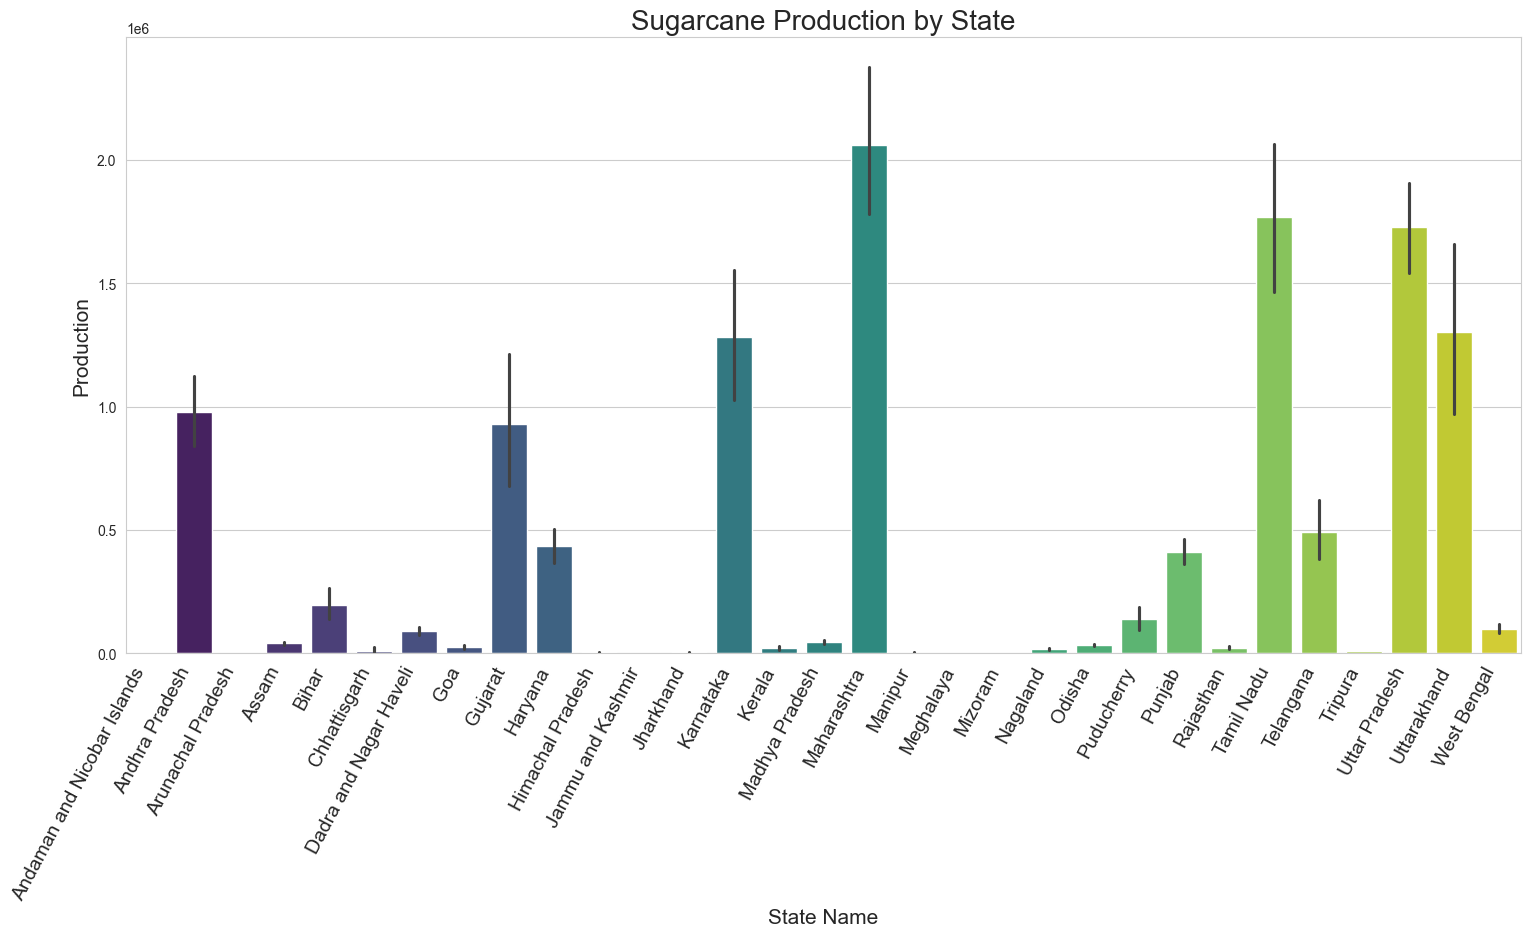

In [214]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.barplot(x='State_Name', y='Production',data=sc_df, palette='viridis')
plt.xticks(rotation=62, ha='right',fontsize=14)
plt.title('Sugarcane Production by State',fontsize=20)
plt.xlabel('State Name',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.show()

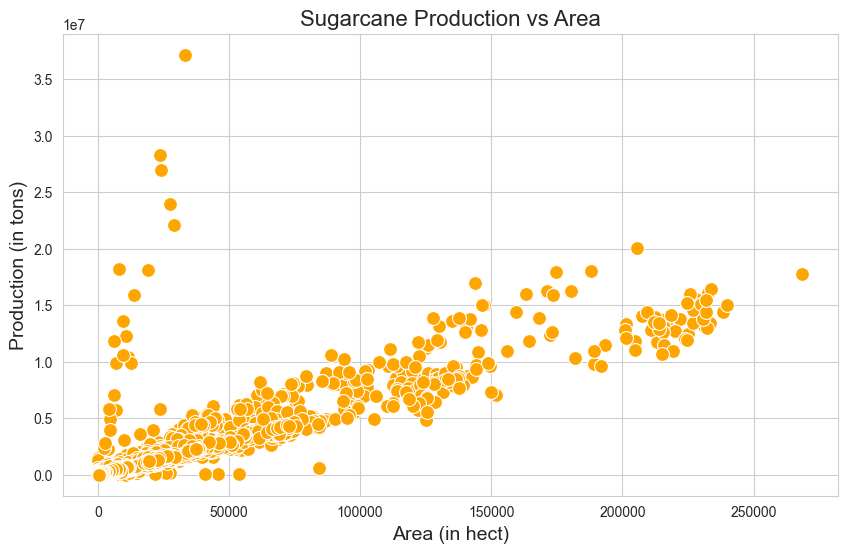

In [215]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production',data=sc_df, color='orange', s=100)
plt.title('Sugarcane Production vs Area', fontsize=16)
plt.xlabel('Area (in hect)', fontsize=14)
plt.ylabel('Production (in tons)', fontsize=14)

plt.show()

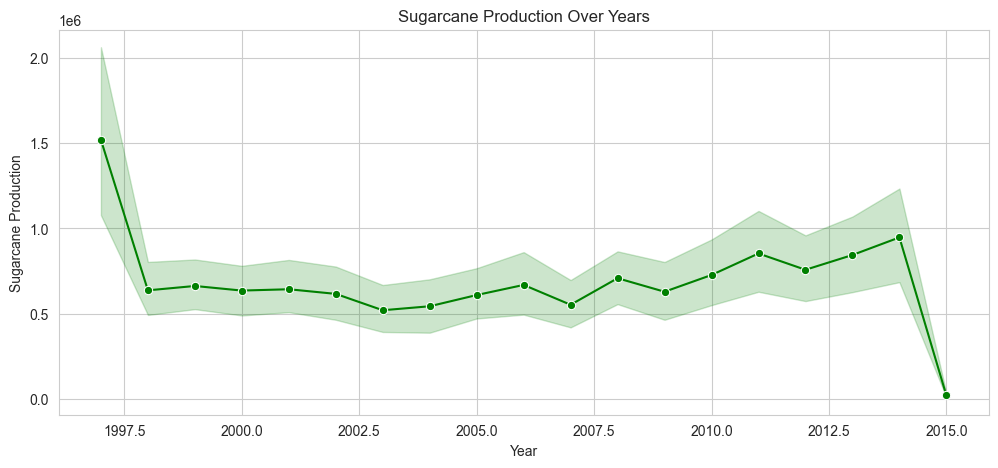

In [216]:
#Line plot for rice production over years
plt.figure(figsize=(12,5))
sns.lineplot(x='Crop_Year', y='Production',data=sc_df,color='green', marker='o', linestyle='-')
plt.title('Sugarcane Production Over Years')
plt.xlabel('Year')
plt.ylabel('Sugarcane Production')
plt.grid(True)

plt.show()

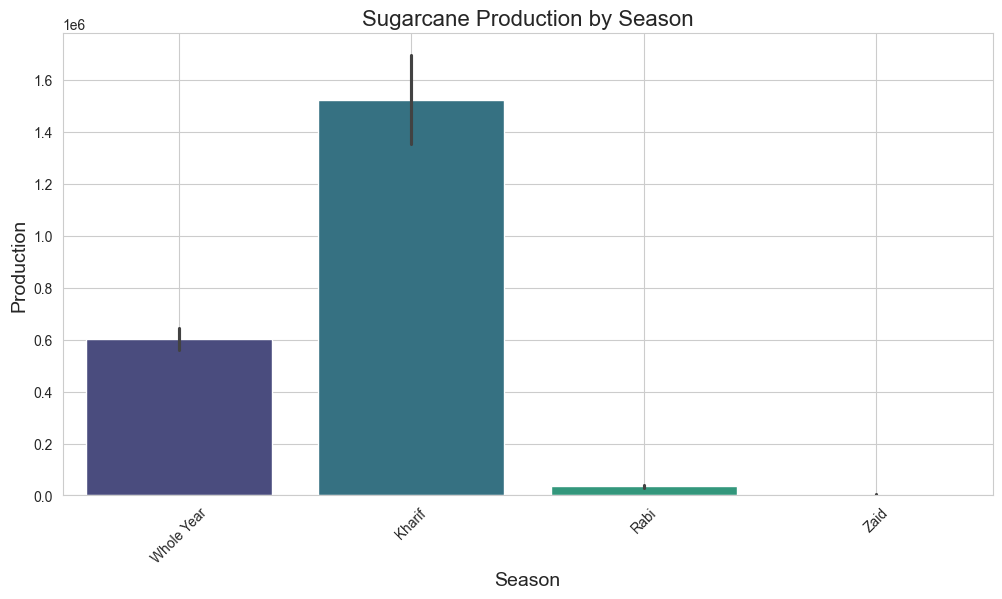

In [217]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid') 
sns.barplot(x='Season', y='Production',data=sc_df, palette='viridis')
plt.title('Sugarcane Production by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

> **Insights**-

- Maharastra has the highest coconut production among the states followed by Tamilnadu and Uttar Pradesh.
- The production and the area is positively related, but there are some outliers having high production in small area.
- Maximum production is generated in Kharif season among other seasons.

## <span style="color: springgreen;">✒️ Data Preprocessing  </span>

In [68]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_yield,crop_cat,Regions
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.59,Nuts,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.50,Pulses,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.15,Cereals,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.64,Fruits,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.23,Nuts,Union Territory


In [69]:
final_df=df.drop(['District_Name','Crop_Year','crop_cat','Regions','crop_yield'],axis=1)


In [70]:
final_df

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,West Bengal,Zaid,Rice,306.0,801.0
246087,West Bengal,Zaid,Sesamum,627.0,463.0
246088,West Bengal,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,Rabi,Rice,279151.0,597899.0


In [71]:
dummies=pd.get_dummies(df[['State_Name','Season','Crop']],dtype=int)
dummy_data=pd.concat([final_df.drop(['State_Name','Season','Crop'],axis=1),dummies],axis=1)
dummy_data

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,801.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,627.0,463.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,324.0,16250.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,279151.0,597899.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <span style="color: springgreen;">✒️ Train Test Split  </span>

In [72]:
x=dummy_data.drop('Production',axis=1)
y=dummy_data['Production']

In [108]:
#Spilt the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.20,random_state=42)

## <span style="color: springgreen;">✒️ Machine Learning Models  </span>

### ✒️Linear Regression Model

In [112]:
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [113]:
y_pred_lr=lr_model.predict(x_test)

### ✒️ DecisionTree Regressor Model

In [114]:
dtr_model=DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [115]:
y_pred_dtr=dtr_model.predict(x_test)

### ✒️ Random Forest Regressor Model

In [142]:
rfr_model=RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [256]:
y_pred_rfr=rfr_model.predict(x_test)

### ✒️ Models Prediction on test data

In [257]:
result_df= pd.DataFrame({'Actual':y_test,
                        'Lr model':y_pred_lr,
                        'Dtr Model':y_pred_dtr,
                        'Rfr model':y_pred_rfr})
result_df.sample(10)

,Actual,Lr model,Dtr Model,Rfr model
50905,4254.0,33672.923276,7927.0,7467.780000
227854,408482.0,411116.591224,529600.0,493506.900000
194846,129.0,-20482.792670,40.0,104.963333
36967,254.0,-8608.276779,467.0,330.638333
27442,13160.0,-21465.633792,9149.0,10841.540000
65659,0.0,11014.788366,50.0,54.947619
101334,15210.0,16781.026711,16860.0,16777.152700
110320,0.0,-19057.815263,0.0,2.630000
188668,96661.0,67320.158974,19128.0,49386.816667
68933,49000.0,74021.624220,130000.0,110125.420000


## <span style="color: springgreen;">✒️ Model Performance  </span>

In [258]:
#Define a function to get Model PErformances
def Models_Score(y_test,preds,ml_models):
    r2_scores=[]
    maes=[]
    for ml_preds in preds:
        r2_scores.append(r2_score(y_test,ml_preds)*100)
        maes.append(mean_absolute_error(y_test,ml_preds))
    Models_Scores=pd.DataFrame({'R2_score':r2_scores,'MAE':maes},index=ml_models).transpose()
    return Models_Scores

In [259]:
ml_models=['Liner_Reg','Decision Tree Reg','Random Forest Reg']
preds=[y_pred_lr,y_pred_dtr,y_pred_rfr]


Models_Score(y_test,preds,ml_models)


,Liner_Reg,Decision Tree Reg,Random Forest Reg
R2_score,17.059870,60.789261,78.603558
MAE,68385.306677,13126.181921,11437.188402


## <span style="color: springgreen;">✒️ Conclusion  </span>

Among these models, the Random Forest Regressor stands out as the best performer with an R² score of 78%, indicating it explains a significant portion of the variance in the data. Additionally, it has the lowest Mean Absolute Error (MAE) of 11437, suggesting it makes predictions closest to the actual values on average.

Including more features like climate and weather conditions, water supply and irigation, fertilizer usage, soil health  and Agricultural Practices could improve accuracy. For now the RFR model is a good choice for predicting production.